In [2]:
import matplotlib.pyplot as plt
from osgeo import gdal
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
from utils.ransac_filter import ransac_filter


In [3]:
path_s3l2_subs = 'data/s3-altimetry/s3a-orbit-289/S3A_SR_2_LAN____20200523T030933_20200523T035741_20200617T203903_2888_058_289______LN3_O_NT_004.SEN3/enhanced_measurement_subs.nc'
path_rsimg = 'data/rs-img/dianchi_s2_20200511_wgs84.tif'


In [4]:
s3_l2_subs = xr.open_dataset(path_s3l2_subs)
img_gdal = gdal.Open(path_rsimg)
rs_img, rs_img_info = readTiff(path_rsimg)


### Data filtering by using ransac algorithm

In [5]:
### Data filtering for single pass data
h_subs = np.copy(s3_l2_subs['elevation_ocog_20_ku'])   ## 
h_ransac_thre, h_ransac_fit = ransac_filter(x=s3_l2_subs['lon_20_ku'], y=h_subs, thre=0.1)


Text(0.5, 1.0, 'Ransac thresholding for single pass data')

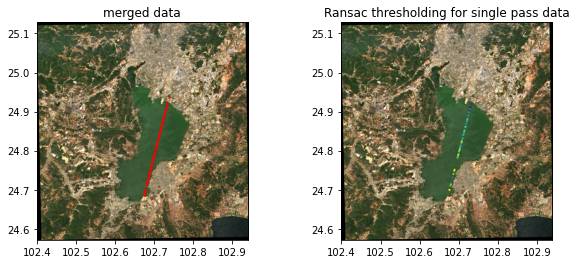

In [8]:
fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
imgShow(rs_img, extent=rs_img_info['geoextent'])
plt.scatter(x=s3_l2_subs['lon_20_ku'], y=s3_l2_subs['lat_20_ku'], s=1, color='red')  ## altimetry data
plt.title('merged data')
plt.subplot(1,2,2); 
imgShow(rs_img, extent=rs_img_info['geoextent'])
plt.scatter(x=s3_l2_subs['lon_20_ku'], y=s3_l2_subs['lat_20_ku'], c=h_ransac_thre, s=1)  ## filtered altimetry data
plt.title('Ransac thresholding for single pass data')


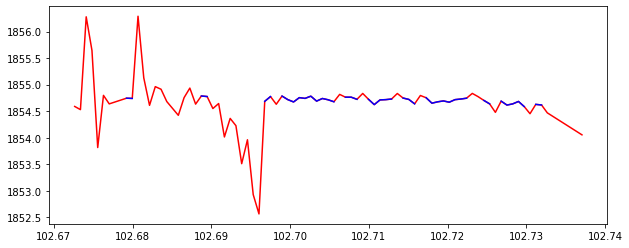

In [9]:
plt.figure(figsize=(10,4))
plt.plot(s3_l2_subs['lon_20_ku'], s3_l2_subs['elevation_ocog_20_ku'], 'r')
plt.plot(s3_l2_subs['lon_20_ku'], h_ransac_thre, 'b')
